In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from tweepy import OAuthHandler
from timeit import default_timer as timer
from io import BytesIO
from PIL import Image
import seaborn as sns
sns.set_style('dark')
%matplotlib inline
import zipfile
import requests
import tweepy
import json
import glob
import re
import os

# Data Gathering

First dataset downloaded manually from the internet.

In [2]:
twitter_archive = pd.read_csv('twitter_archive_enhanced.csv')

Second dataset downloaded programmatically from the internet.

In [8]:
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [9]:
with open('image_predictions.tsv', mode='wb') as file:
    file.write(response.content)

In [3]:
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')

Third dataset obtained programmatically from Twitter's API.


In [11]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True)

tweet_ids = archive.tweet_id.values
len(tweet_ids)

2356

Adding each available tweet to a new line of tweet_json.txt.

In [12]:
count = 0
fails_dict = {}
start = timer()
with open('tweet_json.txt', 'w') as file:    
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, file)
            file.write('\n')
        except tweepy.errors.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807

Success
1032: 745422732645535745
Success
1033: 745314880350101504
Success
1034: 745074613265149952
Success
1035: 745057283344719872
Success
1036: 744995568523612160
Success
1037: 744971049620602880
Success
1038: 744709971296780288
Success
1039: 744334592493166593
Success
1040: 744234799360020481
Success
1041: 744223424764059648
Success
1042: 743980027717509120
Success
1043: 743895849529389061
Success
1044: 743835915802583040
Success
1045: 743609206067040256
Success
1046: 743595368194129920
Success
1047: 743545585370791937
Success
1048: 743510151680958465
Success
1049: 743253157753532416
Success
1050: 743222593470234624
Success
1051: 743210557239623680
Success
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
10

Success
1281: 708834316713893888
Success
1282: 708810915978854401
Success
1283: 708738143638450176
Success
1284: 708711088997666817
Success
1285: 708479650088034305
Success
1286: 708469915515297792
Success
1287: 708400866336894977
Success
1288: 708356463048204288
Success
1289: 708349470027751425
Success
1290: 708149363256774660
Success
1291: 708130923141795840
Success
1292: 708119489313951744
Success
1293: 708109389455101952
Success
1294: 708026248782585858
Success
1295: 707995814724026368
Success
1296: 707983188426153984
Success
1297: 707969809498152960
Success
1298: 707776935007539200
Success
1299: 707741517457260545
Success
1300: 707738799544082433
Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648
Success
1310: 707059547140169728
Success
13

Success
1530: 690248561355657216
Success
1531: 690021994562220032
Success
1532: 690015576308211712
Success
1533: 690005060500217858
Success
1534: 689999384604450816
Success
1535: 689993469801164801
Success
1536: 689977555533848577
Success
1537: 689905486972461056
Success
1538: 689877686181715968
Success
1539: 689835978131935233
Success
1540: 689661964914655233
Success
1541: 689659372465688576
Success
1542: 689623661272240129
Success
1543: 689599056876867584
Success
1544: 689557536375177216
Success
1545: 689517482558820352
Success
1546: 689289219123089408
Success
1547: 689283819090870273
Success
1548: 689280876073582592
Success
1549: 689275259254616065
Success
1550: 689255633275777024
Success
1551: 689154315265683456
Success
1552: 689143371370250240
Success
1553: 688916208532455424
Success
1554: 688908934925697024
Success
1555: 688898160958271489
Success
1556: 688894073864884227
Success
1557: 688828561667567616
Success
1558: 688804835492233216
Success
1559: 688789766343622656
Success
15

Success
1779: 677895101218201600
Success
1780: 677716515794329600
Success
1781: 677700003327029250
Success
1782: 677698403548192770
Success
1783: 677687604918272002
Success
1784: 677673981332312066
Success
1785: 677662372920729601
Success
1786: 677644091929329666
Success
1787: 677573743309385728
Success
1788: 677565715327688705
Success
1789: 677557565589463040
Success
1790: 677547928504967168
Success
1791: 677530072887205888
Success
1792: 677335745548390400
Success
1793: 677334615166730240
Success
1794: 677331501395156992
Success
1795: 677328882937298944
Success
1796: 677314812125323265
Success
1797: 677301033169788928
Success
1798: 677269281705472000
Success
1799: 677228873407442944
Success
1800: 677187300187611136
Success
1801: 676975532580409345


Rate limit reached. Sleeping for: 39


Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Success
1811: 676821958043033607
Success
1812: 676819651066732545
Success
1813: 676811746707918848
Success
1814: 676776431406465024
Success
1815: 676617503762681856
Success
1816: 676613908052996102
Success
1817: 676606785097199616
Success
1818: 676603393314578432
Success
1819: 676593408224403456
Success
1820: 676590572941893632
Success
1821: 676588346097852417
Success
1822: 676582956622721024
Success
1823: 676575501977128964
Success
1824: 676533798876651520
Success
1825: 676496375194980353
Success
1826: 676470639084101634
Success
1827: 676440007570247681
Success
1828: 676430933382295552
Success
1829: 676263575653122048
Success
1830: 676237365392908289
Success
1831: 676219687039057920
Success
18

Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
2058: 671355857343524864
Success
2059: 671347597085433856
Success
2060: 671186162933985280
Success
2061: 671182547775299584
Success
2062: 671166507850801152
Success
2063: 671163268581498880
Success
2064: 671159727754231808
Success
2065: 671154572044468225
Success
2066: 671151324042559489
Success
2067: 671147085991960577
Success
2068: 671141549288370177
Success
2069: 671138694582165504
Success
2070: 671134062904504320
Success
2071: 671122204919246848
Success
2072: 671115716440031232
Success
2073: 671109016219725825
Success
2074: 670995969505435648
Success
2075: 670842764863651840
Success
2076: 670840546554966016
Success
2077: 670838202509447168
Success
2078: 670833812859932673
Success
2079: 670832455012716544
Success
2080: 670826280409919488
Success
20

Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
2307: 666835007768551424
Success
2308: 666826780179869698
Success
2309: 666817836334096384
Success
2310: 666804364988780544
Success
2311: 666786068205871104
Success
2312: 666781792255496192
Success
2313: 666776908487630848
Success
2314: 666739327293083650
Success
2315: 666701168228331520
Success
2316: 666691418707132416
Success
2317: 666649482315059201
Success
2318: 666644823164719104
Success
2319: 666454714377183233
Success
2320: 666447344410484738
Success
2321: 666437273139982337
Success
2322: 666435652385423360
Success
2323: 666430724426358785
Success
2324: 666428276349472768
Success
2325: 666421158376562688
Success
2326: 666418789513326592
Success
2327: 666411507551481857
Success
2328: 666407126856765440
Success
2329: 666396247373291520
Success
23

Reading the .txt file line by line into a list of dictionaries.

In [4]:
tweet_list = []

for line in open('tweet_json.txt', 'r'):
    tweet_data = json.loads(line)
    tweet_list.append({'tweet_id': tweet_data['id_str'],
                       'timestamp': tweet_data['created_at'], 
                       'favorite_count': tweet_data['favorite_count'], 
                       'retweet_count': tweet_data['retweet_count'],
                       'followers_count': tweet_data['user']['followers_count'],                                                                
                       })    

Converting the list of dictionaries to a pandas DataFrame.

In [5]:
tweet_df = pd.DataFrame(tweet_list, columns = ['tweet_id', 
                                               'timestamp', 
                                               'favorite_count', 
                                               'retweet_count', 
                                               'followers_count'])

# Data Assessing

In [32]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [36]:
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
348,831670449226514432,NaN,NaN,2017-02-15 01:04:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Daisy. She has a heart on her butt. 13...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/831670449...,13,10,Daisy,None,None,None,None
1402,699423671849451520,NaN,NaN,2016-02-16 02:42:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Don't ever talk to me or my son again."" ...bo...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/699423671...,10,10,None,None,None,None,None
1985,672898206762672129,NaN,NaN,2015-12-04 22:00:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cheryl AKA Queen Pupper of the Skies. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672898206...,11,10,Cheryl,None,None,pupper,None
967,750381685133418496,7.501805e+17,4.717297e+09,2016-07-05 17:31:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",13/10 such a good doggo\n@spaghemily,NaN,NaN,NaN,NaN,13,10,None,doggo,None,None,None
211,851953902622658560,NaN,NaN,2017-04-12 00:23:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Astrid. She's a guide d...,8.293743e+17,4.196984e+09,2017-02-08 17:00:26 +0000,https://twitter.com/dog_rates/status/829374341...,13,10,Astrid,doggo,None,None,None


In [8]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [10]:
twitter_archive.duplicated().sum()

0

In [47]:
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [48]:
twitter_archive.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [18]:
twitter_archive[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [19]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [20]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [21]:
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [35]:
twitter_archive.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [37]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [38]:
image_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
66,667176164155375616,https://pbs.twimg.com/media/CUJJLtWWsAE-go5.jpg,1,soft-coated_wheaten_terrier,0.318981,True,Lakeland_terrier,0.215218,True,toy_poodle,0.106014,True
746,687664829264453632,https://pbs.twimg.com/media/CYsTg1XUsAEPjxE.jpg,1,pug,0.957365,True,French_bulldog,0.038559,True,toy_poodle,0.000667,True
1690,815736392542261248,https://pbs.twimg.com/media/C1IT6rVXUAIvwYT.jpg,3,Border_collie,0.548907,True,Cardigan,0.178523,True,collie,0.146351,True
1198,740699697422163968,https://pbs.twimg.com/media/Ckd-bqVUkAIiyM7.jpg,1,lawn_mower,0.878863,False,swing,0.024535,False,barrow,0.019577,False
1788,829861396166877184,https://pbs.twimg.com/media/C4RCiIHWYAAwgJM.jpg,1,Border_terrier,0.394486,True,Staffordshire_bullterrier,0.376574,True,American_Staffordshire_terrier,0.031292,True


In [39]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [40]:
image_predictions.duplicated().sum()

0

In [49]:
image_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [50]:
image_predictions.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [41]:
tweet_df.head()

,tweet_id,timestamp,favorite_count,retweet_count,followers_count
0,892420643555336193,Tue Aug 01 16:23:56 +0000 2017,33700,6979,9344068
1,892177421306343426,Tue Aug 01 00:17:27 +0000 2017,29234,5280,9343188
2,891815181378084864,Mon Jul 31 00:18:03 +0000 2017,21976,3466,9344068
3,891689557279858688,Sun Jul 30 15:58:51 +0000 2017,36776,7190,9343187
4,891327558926688256,Sat Jul 29 16:00:24 +0000 2017,35171,7723,9343187


In [42]:
tweet_df.sample(5)

,tweet_id,timestamp,favorite_count,retweet_count,followers_count
1526,688898160958271489,Mon Jan 18 01:38:15 +0000 2016,1924,709,9343304
288,836380477523124226,Tue Feb 28 01:00:19 +0000 2017,13888,2745,9344092
1827,675522403582218240,Sat Dec 12 03:47:46 +0000 2015,940,249,9344211
486,813051746834595840,Sun Dec 25 16:00:16 +0000 2016,19877,6820,9343227
1320,704347321748819968,Mon Feb 29 16:47:42 +0000 2016,1442,312,9343290


In [43]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         2327 non-null   object
 1   timestamp        2327 non-null   object
 2   favorite_count   2327 non-null   int64 
 3   retweet_count    2327 non-null   int64 
 4   followers_count  2327 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 91.0+ KB


In [44]:
tweet_df.duplicated().sum()

0

In [51]:
tweet_df.isnull().sum()

tweet_id           0
timestamp          0
favorite_count     0
retweet_count      0
followers_count    0
dtype: int64

In [52]:
tweet_df.nunique()

tweet_id           2327
timestamp          2327
favorite_count     1990
retweet_count      1634
followers_count     305
dtype: int64

## Quality Issues

### twitter_archive Table

- Retweets contained in original tweets.
- Presence of unwanted columns.
- Data type for "tweet_id" not of string.
- Data type for "timestamp" not of datetime.
- Columns with too many missing values ("retweeted_status_user_id", "retweeted_status_id", "retweeted_status_timestamp", "in_reply_to_user_id", "in_reply_to_status_id").
- Wrong dog names (e.g. "a").
- Errors in rating values.
- Missing values in dog stages represented as "None".
- Some entries having more than one dog stage.


### image_predictions Table

- Inconsistencies in breed names.
- Data type of "tweet_id" not of string.
- Missing values (2075 entries instead of 2356).

### twitter_df Table

- Data type of "tweet_id" not of string.
- Missing values (2327 entries out of 2356).

## Tidiness Issues

### twitter_archive Table

- Multiple columns of dog stages (doggo, floofer, pupper, puppo).
- Links contained in the "text" column, in addition to text descriptions.

### image_predictions Table

- A split unit of the twitter_archive table.

### twitter_df Table

- A split unit of the twitter_archive table.

# Data Cleaning

Making copies of the tables before cleaning.

In [6]:
archive_clean = twitter_archive.copy()
image_clean = image_predictions.copy()
json_clean = tweet_df.copy()

### Define

- Keep original ratings only, remove retweets.

### Code

In [7]:
archive_clean = archive_clean[pd.isnull(archive_clean['retweeted_status_user_id'])]

### Test

In [8]:
print(sum(archive_clean.retweeted_status_user_id.value_counts()))

0


### Define

- Drop all unwanted columns.

### Code

In [9]:
archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'source', 'retweeted_status_id', 
                    'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls'], axis = 1, inplace = True)
json_clean.drop(['timestamp'], axis = 1, inplace = True)

### Test

In [49]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2356 non-null   int64 
 1   timestamp           2356 non-null   object
 2   text                2356 non-null   object
 3   rating_numerator    2356 non-null   int64 
 4   rating_denominator  2356 non-null   int64 
 5   name                2356 non-null   object
 6   doggo               2356 non-null   object
 7   floofer             2356 non-null   object
 8   pupper              2356 non-null   object
 9   puppo               2356 non-null   object
dtypes: int64(3), object(7)
memory usage: 184.2+ KB


In [50]:
json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         2327 non-null   object
 1   favorite_count   2327 non-null   int64 
 2   retweet_count    2327 non-null   int64 
 3   followers_count  2327 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 72.8+ KB


### Define

- Remove outliers.

### Code

In [10]:
archive_clean = archive_clean[archive_clean.rating_denominator == 10]
archive_clean= archive_clean[archive_clean['rating_numerator'].between(6, 21)]

### Test

In [58]:
archive_clean.rating_numerator.value_counts()

12    558
11    463
10    461
13    351
9     156
8     102
14     54
7      54
6      32
15      2
17      1
Name: rating_numerator, dtype: int64

In [59]:
archive_clean.rating_denominator.value_counts()

10    2234
Name: rating_denominator, dtype: int64

### Define

- Correct variable data types.

### Code

In [11]:
archive_clean.tweet_id = archive_clean.tweet_id.astype(str)
image_clean.tweet_id = image_clean.tweet_id.astype(str)
json_clean.tweet_id = json_clean.tweet_id.astype(str)
archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp)

### Test

In [61]:
archive_clean[['tweet_id', 'timestamp']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2234 entries, 0 to 2355
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   tweet_id   2234 non-null   object             
 1   timestamp  2234 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), object(1)
memory usage: 52.4+ KB


In [62]:
image_clean.tweet_id.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2075 entries, 0 to 2074
Series name: tweet_id
Non-Null Count  Dtype 
--------------  ----- 
2075 non-null   object
dtypes: object(1)
memory usage: 16.3+ KB


In [63]:
json_clean.tweet_id.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2327 entries, 0 to 2326
Series name: tweet_id
Non-Null Count  Dtype 
--------------  ----- 
2327 non-null   object
dtypes: object(1)
memory usage: 18.3+ KB


### Define

- Make the "p1", "p2" and "p3" entries consistent.

### Code

In [12]:
image_clean.p1 = image_clean.p1.str.lower()
image_clean.p2 = image_clean.p2.str.lower()
image_clean.p3 = image_clean.p3.str.lower()

### Test

In [65]:
image_clean[['p1', 'p2', 'p3']].head(5)

,p1,p2,p3
0,welsh_springer_spaniel,collie,shetland_sheepdog
1,redbone,miniature_pinscher,rhodesian_ridgeback
2,german_shepherd,malinois,bloodhound
3,rhodesian_ridgeback,redbone,miniature_pinscher
4,miniature_pinscher,rottweiler,doberman


### Define

For the text column in the archive_clean table;
- Change the html ampersand code from "&amp ;" to "&".
- Remove the newline symbol, "/n ".
- Remove ending url link.

### Code

In [13]:
archive_clean.replace({'text' : {"&amp;": "&", "\n": " ", r"http\S+": ""}})
archive_clean.text = archive_clean.text.str.strip()

### Test

In [67]:
'&' in archive_clean.text

False

### Define

- Correct improper dog names such as "a".

### Code

In [14]:
archive_clean.name = archive_clean.name.str.replace('^[a-z]+', 'None', regex = True)

### Test

In [69]:
'a' in archive_clean.name

False

### Define

- Treat entries having multiple dog stages.

### Code

Merge all columns of dog stages.

In [15]:
archive_clean['stage'] = archive_clean.doggo + archive_clean.floofer + archive_clean.pupper + archive_clean.puppo

In [16]:
archive_clean.stage.value_counts()

NoneNoneNoneNone        1717
NoneNonepupperNone       221
doggoNoneNoneNone         75
NoneNoneNonepuppo         24
NoneflooferNoneNone        9
doggoNonepupperNone        9
doggoNoneNonepuppo         1
doggoflooferNoneNone       1
Name: stage, dtype: int64

In [17]:
def check_stage(archive):
    """
    This function checks for multiple dog stages.
           
    """
    if archive['stage'].count('None') == 2:
        return 'Multiple'
    else:
        if archive['stage'].count('doggo') == 1:
            return 'Doggo'
        elif archive['stage'].count('floofer') == 1:
            return 'Floofer'
        elif archive['stage'].count('pupper') == 1:
            return 'Pupper'
        elif archive['stage'].count('puppo') == 1:
            return 'Puppo'
        else:
            return 'None'

archive_clean['dog_stage'] = archive_clean.apply(check_stage, axis=1)

### Test

In [73]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2234 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2234 non-null   object             
 1   timestamp           2234 non-null   datetime64[ns, UTC]
 2   text                2234 non-null   object             
 3   rating_numerator    2234 non-null   int64              
 4   rating_denominator  2234 non-null   int64              
 5   name                2234 non-null   object             
 6   doggo               2234 non-null   object             
 7   floofer             2234 non-null   object             
 8   pupper              2234 non-null   object             
 9   puppo               2234 non-null   object             
 10  stage               2234 non-null   object             
 11  dog_stage           2234 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2

Drop dog stage columns which are no longer needed.

In [18]:
archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo', 'stage'], axis=1, inplace=True)

In [75]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2234 entries, 0 to 2355
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2234 non-null   object             
 1   timestamp           2234 non-null   datetime64[ns, UTC]
 2   text                2234 non-null   object             
 3   rating_numerator    2234 non-null   int64              
 4   rating_denominator  2234 non-null   int64              
 5   name                2234 non-null   object             
 6   dog_stage           2234 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2), object(4)
memory usage: 204.2+ KB


In [76]:
archive_clean.dog_stage.value_counts()

None        1858
Pupper       242
Doggo         83
Puppo         29
Multiple      13
Floofer        9
Name: dog_stage, dtype: int64

### Define

- Merge all three tables to resolve tidiness issues.

### Code

In [19]:
archive_clean = pd.merge(left = archive_clean, right = json_clean, how = 'left', on = 'tweet_id')
archive_clean = pd.merge(left = archive_clean, right = image_clean, how = 'left', on = 'tweet_id')

### Test

In [78]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2234 entries, 0 to 2233
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2234 non-null   object             
 1   timestamp           2234 non-null   datetime64[ns, UTC]
 2   text                2234 non-null   object             
 3   rating_numerator    2234 non-null   int64              
 4   rating_denominator  2234 non-null   int64              
 5   name                2234 non-null   object             
 6   dog_stage           2234 non-null   object             
 7   favorite_count      2206 non-null   float64            
 8   retweet_count       2206 non-null   float64            
 9   followers_count     2206 non-null   float64            
 10  jpg_url             1969 non-null   object             
 11  img_num             1969 non-null   float64            
 12  p1                  1969 non-null 

### Define

- Drop tweets having no image.

### Code

In [20]:
archive_clean.dropna(axis = 0, inplace=True)

### Test

In [21]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1881 entries, 0 to 2056
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1881 non-null   object             
 1   timestamp           1881 non-null   datetime64[ns, UTC]
 2   text                1881 non-null   object             
 3   rating_numerator    1881 non-null   int64              
 4   rating_denominator  1881 non-null   int64              
 5   name                1881 non-null   object             
 6   dog_stage           1881 non-null   object             
 7   favorite_count      1881 non-null   float64            
 8   retweet_count       1881 non-null   float64            
 9   followers_count     1881 non-null   float64            
 10  jpg_url             1881 non-null   object             
 11  img_num             1881 non-null   float64            
 12  p1                  1881 non-null 

# Cleaned Data Saving

In [22]:
archive_clean.to_csv('twitter_archive_master.csv', index=False)

# Analysis and Visualization

In [23]:
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

Define a plot funtion.

In [24]:
def pic_rep(df, title, xlabel, ylabel, x_variable, y_variable):
    """
    This function makes a scattered plot between two specified variables.
    
    Parameters:
        
        df: The DataFrame to be plotted.
        title (string): Title of the plot.
        xlabel (string): x-axis label.
        ylabel (string): y-axis label.
        x_variable (string): Variable on the horizontal axis.
        y_variable (string): Variable on the vertical axis.
        
    """
    df.plot(x = x_variable, y = y_variable, kind = 'scatter', figsize = (10, 5))
    plt.title(title, size = 16)
    plt.xlabel(xlabel, fontsize = 12)
    plt.ylabel(ylabel, fontsize = 12)
    plt.show()

### Is there a relationship between rating numerator and favorite count?

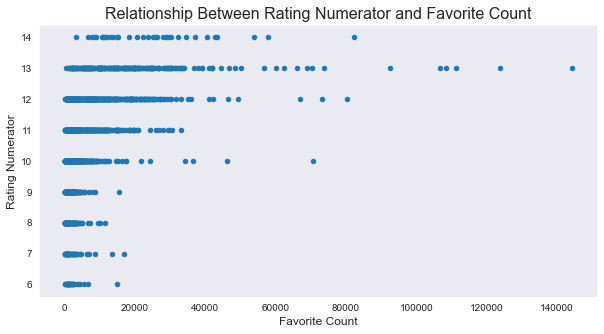

In [25]:
pic_rep(twitter_archive_master, 'Relationship Between Rating Numerator and Favorite Count', 'Favorite Count', 'Rating Numerator', 'favorite_count', 'rating_numerator');

As seen in the Rating Numerator vs Favorite Count plot above, higher ratings usually have higher favorite counts.

### Is there a relationship between rating numerator and retweet count?

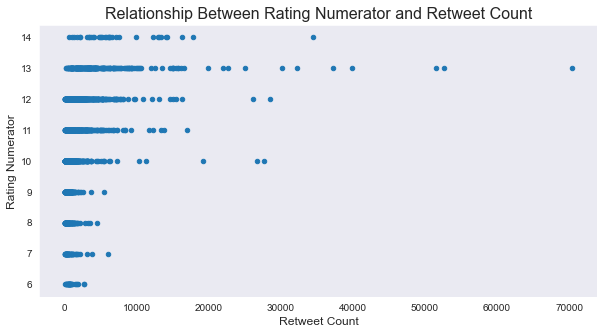

In [26]:
pic_rep(twitter_archive_master, 'Relationship Between Rating Numerator and Retweet Count', 'Retweet Count', 'Rating Numerator', 'retweet_count', 'rating_numerator');

The Rating Numerator vs Retweet Count plot above shows that higher ratings usually have higher retweet counts.

### Is there a relationship between favorite count and retweet count?

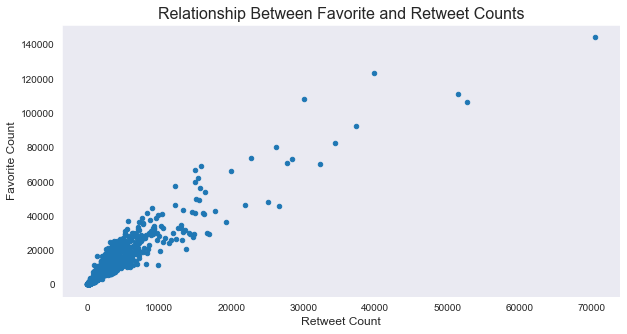

In [27]:
pic_rep(twitter_archive_master, 'Relationship Between Favorite and Retweet Counts', 'Retweet Count', 'Favorite Count', 'retweet_count', 'favorite_count');

There is a positive correlation between favorite count and retweet count, as seen in the Favorite Count vs Retweet Count plot above.

### Which are the popular dog breeds?

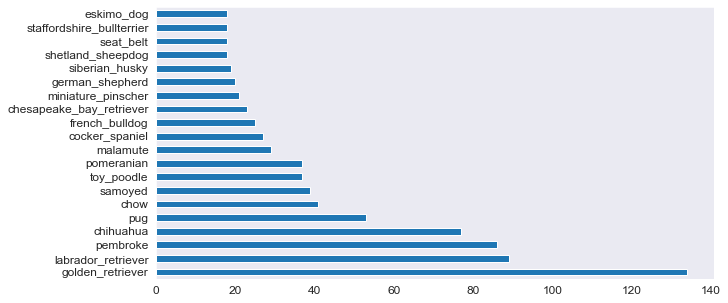

In [28]:
twitter_archive_master.p1.value_counts()[:20].plot(figsize = (10, 5), kind = 'barh', fontsize = 12);

The most rated dog breed is the Golden Retriever.

# References:
- https://www.adamsmith.haus/python/answers/how-to-remove-outliers-from-a-pandas-dataframe-in-python
- https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id
- http://stackabuse.com/reading-and-writing-json-to-a-file-in-python/
- https://stackoverflow.com/questions/50491747/extracting-the-meaningful-information-from-the-text-column-using-python
- https://regexone.com/